In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("dark_background");

In [2]:
time_step = reader.fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc\\Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc");

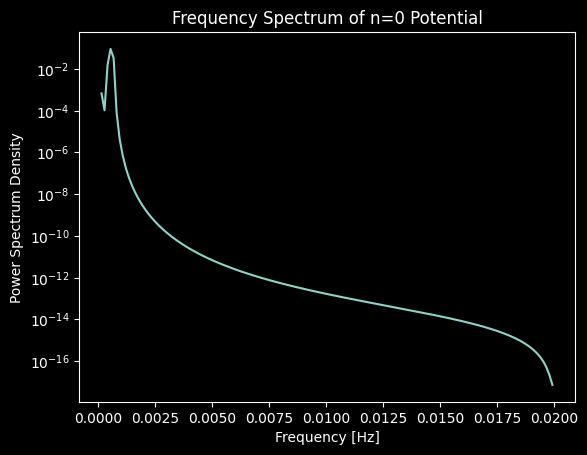

In [5]:
hovmoller_matrix = utils.generate_poloidally_averaged_time_series(data_arrays);
frequencies, power_spectrum_density = utils.map_power_spectrum(hovmoller_matrix, 40, time_step);
plt.semilogy(frequencies, power_spectrum_density);
plt.xlabel("Frequency [Hz]");
plt.ylabel("Power Spectrum Density");
plt.title("Frequency Spectrum of n=0 Potential");
# TODO: clearly this is nonsense. need to actually calculate deltat using R/v_th in simulation input
# TODO: look at lines ~628-ish for the requisite parameters in GAM_analytical
plt.show()